In [21]:
using DifferentialEquations 
using Plots

days_num = 60 *365
mu= 1/(70*365)
beta = 1.428
sigma = 1/14.0
gamma = 1/7.0
S0 = 0.1
E0 = 0.0001
I0= 0.0001
INPUT=[S0; E0; I0; 0]
tend=3000

3000

In [22]:
function SEIR(du, u, p, t)
    du[1]=mu- (beta*u[3]+mu)*u[1]
    du[2]=beta*u[1]*u[3]-(mu* sigma)*u[2]
    du[3]=sigma*u[2]-(mu+gamma)*u[3]
    du[4]=gamma*u[3]-mu*u[4]
end

SEIR (generic function with 1 method)

In [13]:
tspan=[0.0,tend]
prob=ODEProblem(SEIR, INPUT, tspan)
sol=solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 29-element Vector{Float64}:
   0.0
   0.2502742136545163
   1.8628594525552153
   4.6684510640756045
   8.096688523259061
  12.605545751473123
  18.157699066209243
  25.220377035092703
  34.108884725283794
  45.36685222205201
  58.25502932467302
  72.40458853548758
  87.59362937235697
   ⋮
 160.9522146905166
 175.0882485109031
 189.08556281853484
 202.83835826188005
 217.18796866354057
 232.56741233677167
 249.7240759008812
 269.3657722435412
 292.6056343880625
 320.95657740795167
 356.56474115334856
 365.0
u: 29-element Vector{Vector{Float64}}:
 [0.1, 0.0001, 0.0001, 0.0]
 [0.10000527309622707, 0.00010354272820658084, 9.827433564475026e-5, 3.5441067055442993e-6]
 [0.1000404922988016, 0.00012512496926952, 8.986984648474642e-5, 2.5129737132990473e-5]
 [0.10010478322592543, 0.00015965207072181616, 8.391687789076951e-5, 5.9642219240274775e-5]
 [0.10018407347751739, 0.00020110052895667936, 8.663973574924572e-5, 0.00

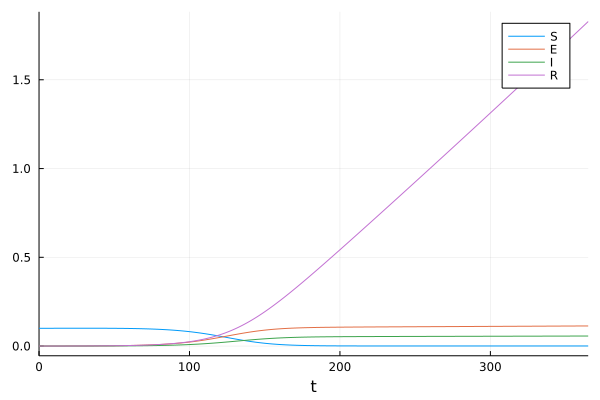

In [14]:
plot(sol, vars=(0,1), label="S")
plot!(sol, vars=(0,2), label="E")
plot!(sol, vars=(0,3), label="I")
plot!(sol, vars=(0,4), label="R")

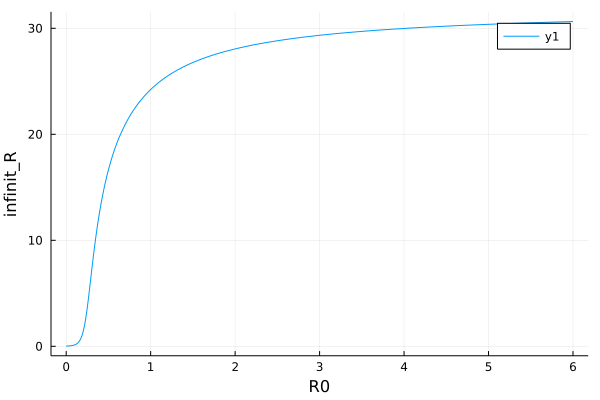

In [23]:
tspan=[0.0,tend]
infinit_R=[]
for R0 in  0:0.01:6
    beta=R0*gamma
    prob=ODEProblem(SEIR, INPUT, tspan)
    sol=solve(prob)
    append!(infinit_R, sol[end][4])
end

plot(0:0.01:6, infinit_R, xlabel="R0", ylabel="infinit_R")